In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df_full=pd.read_csv("DataB.csv")

In [3]:
df_full

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,2062,4,0,3,0,4,0,4,3,1,...,0,1,4,5,4,2,2,2,2,4
2062,2063,2,2,3,4,2,1,2,3,3,...,4,0,1,3,4,0,2,3,2,4
2063,2064,2,3,2,3,1,2,5,5,5,...,5,1,1,2,5,2,1,1,3,4
2064,2065,5,2,4,3,1,0,3,2,2,...,3,2,3,1,4,2,4,3,4,4


In [4]:
df_features=df_full.filter(regex=("fea.*"))

In [5]:
df_features

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,4,0,3,0,4,0,4,3,1,2,...,3,0,1,4,5,4,2,2,2,2
2062,2,2,3,4,2,1,2,3,3,4,...,1,4,0,1,3,4,0,2,3,2
2063,2,3,2,3,1,2,5,5,5,0,...,3,5,1,1,2,5,2,1,1,3
2064,5,2,4,3,1,0,3,2,2,1,...,2,3,2,3,1,4,2,4,3,4


In [6]:
# df_features=StandardScaler().fit_transform(df_fea) # applying normalization
# df_features=((df_fea-df_fea.mean())) #mean centered only .

In [7]:
from scipy.stats import zscore #taking zscore as mentioned on piazza. pca requires mean centered data.
df_features_znorm=df_features.apply(zscore)

In [8]:
df_features_znorm

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.010077,0.966782,0.359594,-1.668004,-1.638671,1.007994,-0.324102,-0.992537,0.983784,-0.981814,...,-1.003413,-0.987770,0.314967,-1.650964,1.025781,-0.332975,-1.009889,-1.034285,1.047333,1.649643
1,1.687176,-1.029924,1.026488,0.336317,-0.976018,0.340307,1.674690,-0.992537,0.983784,1.005542,...,0.318686,-0.987770,-1.004957,0.340991,0.364131,-1.001515,0.313988,0.307104,1.702034,0.984636
2,-1.021220,0.301213,-1.641090,0.336317,-0.976018,-0.995067,-1.656630,-0.992537,-1.679168,-0.319362,...,0.979735,0.356586,-1.664918,-0.322994,1.025781,-0.332975,-0.347950,-1.034285,-0.262071,0.984636
3,1.687176,0.301213,-0.307301,0.336317,1.674594,-0.327380,-0.324102,-1.648724,0.983784,1.667994,...,0.979735,1.700943,0.974929,1.668962,-0.959168,1.004104,0.975927,-0.363590,1.047333,0.984636
4,0.332978,1.632350,0.359594,0.336317,-1.638671,1.007994,-0.990366,-0.992537,0.983784,0.343090,...,-1.003413,-0.987770,0.314967,0.340991,0.364131,-1.001515,-0.347950,0.977798,-0.916772,-1.010386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1.010077,-1.695492,0.359594,-1.668004,1.011941,-1.662753,1.008426,0.319835,-1.013430,-0.319362,...,0.318686,-1.659949,-1.004957,1.004977,1.687430,1.004104,-0.347950,-0.363590,-0.262071,-0.345379
2062,-0.344121,-0.364355,0.359594,1.004424,-0.313365,-0.995067,-0.324102,0.319835,0.318046,1.005542,...,-1.003413,1.028765,-1.664918,-0.986979,0.364131,1.004104,-1.671828,-0.363590,0.392631,-0.345379
2063,-0.344121,0.301213,-0.307301,0.336317,-0.976018,-0.327380,1.674690,1.632208,1.649523,-1.644266,...,0.318686,1.700943,-1.004957,-0.986979,-0.297518,1.672643,-0.347950,-1.034285,-0.916772,0.319628
2064,1.687176,-0.364355,1.026488,0.336317,-0.976018,-1.662753,0.342162,-0.336351,-0.347692,-0.981814,...,-0.342363,0.356586,-0.344995,0.340991,-0.959168,1.004104,-0.347950,0.977798,0.392631,0.984636


<h2>1.  In PCA, compute the eigenvectors and eigenvalues. Plot the scree plot
and visually discuss which cut-off is good.</h2>

<h6>finding covariance matrix --> (xt.x). This will lead to d*d matrix along dimensions .</h6>

In [9]:
covariance_matrix=np.cov(df_features_znorm.T) #.T otherwise use rowvar=False. if true each row reperesnts a variable.

In [10]:
covariance_matrix=pd.DataFrame(covariance_matrix)

In [11]:
covariance_matrix.head() # here 0 stands for fea1 and so on.calculated on feature space xt.x .. 0 -->i.e feature 1's  variance with d features in first column and so on ..

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1.000484,-0.020254,0.028026,-0.027699,-0.003159,0.026745,-0.007159,-0.027586,-0.007723,-0.060428,...,0.007846,-0.038566,0.014739,-0.021286,0.037935,0.000226,-0.012358,0.000612,0.013244,0.031764
1,-0.020254,1.000484,0.021676,-0.033306,-0.008296,0.047226,0.001896,0.003229,-0.035551,-0.004536,...,-0.025302,-0.009102,-0.016002,-0.001321,0.040824,0.019972,-0.013337,-0.009755,0.036141,-0.018090
2,0.028026,0.021676,1.000484,0.000480,-0.022512,-0.009226,-0.016804,-0.005930,0.016513,-0.006836,...,-0.029899,-0.001947,0.038437,0.011987,0.019001,0.047465,0.020218,0.006046,-0.027714,0.031048
3,-0.027699,-0.033306,0.000480,1.000484,0.008106,-0.009736,-0.030415,0.009572,0.007357,-0.009993,...,-0.026601,0.050734,0.008255,0.044448,0.036530,0.007351,-0.004352,-0.006988,0.005783,-0.003198
4,-0.003159,-0.008296,-0.022512,0.008106,1.000484,-0.047146,-0.050727,0.010993,0.000587,0.021682,...,0.033305,-0.016330,0.009165,0.010172,-0.041683,0.010167,0.033017,-0.006164,0.007126,0.001832


<h6>finding the eigen vectors and corresponding eigen values and sorting them out in decreasing order.</h6>

In [12]:
values, vectors = np.linalg.eigh(covariance_matrix)  #eigh? changing the signs. because its a symmetric cov matrix therefore eigh

In [13]:
sorted_values = np.argsort(values)[::-1] #sorting acc to index reverse returns array of indices of same shape.

In [14]:
# sorted_values

In [15]:
# sorted_values=pd.DataFrame(sorted_values)
# sorted_values.head()
# sorted_values=sorted_values.to_numpy()

In [16]:
sorted_vectors = vectors[:,sorted_values] #sorting the vectors acc to same index 

In [17]:
values = values[sorted_values] #sorting values

In [18]:
values=pd.DataFrame(values)

In [19]:
sorted_vectors=pd.DataFrame(sorted_vectors.T)

<h6>eigen values: the amount of variance explained by each of these vectors/axes/components.</h6>

In [20]:
values

,0
0,51.777319
1,28.800865
2,26.770911
3,23.930346
4,21.575039
...,...
779,0.008340
780,0.008145
781,0.007711
782,0.007438


<h6>Directions created with highest variance with respect to data in feature space.  i.e first column highest e value will lead to first pc when projected with original data.
eigen vectors: pricipal axes in feature space representing the maximum variance in data.</h6>

In [21]:
sorted_vectors 

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.001979,0.001513,-0.000492,-0.003617,-0.000810,0.005896,-0.001439,-0.001285,-0.004915,-0.002636,...,-0.002642,-0.000678,0.001724,-0.001867,0.006185,0.002179,-0.003063,-0.000112,-0.001323,0.005912
1,0.004933,-0.006404,-0.001566,0.000518,-0.002937,-0.003685,-0.008790,0.000596,-0.000131,-0.004207,...,-0.004506,-0.001961,0.004526,0.003306,-0.007419,-0.004995,-0.005274,0.003005,0.009471,0.002876
2,-0.000375,0.002587,-0.003725,0.000352,-0.001220,-0.000092,-0.002634,0.005623,-0.000141,-0.000913,...,-0.000357,0.004578,0.003625,0.006495,0.004720,0.002290,0.010619,-0.003359,0.005531,0.006242
3,0.006154,0.002790,-0.003226,-0.002489,0.010679,0.000604,-0.001788,-0.003557,-0.000985,0.000627,...,0.012484,-0.006529,0.003851,-0.008501,-0.003250,-0.005949,-0.001025,0.003811,-0.001099,0.003276
4,-0.003251,0.003767,0.001384,-0.000363,-0.001331,0.008793,0.002887,0.007900,-0.000897,-0.004340,...,0.001125,-0.004288,0.004768,-0.000073,0.006416,0.002894,0.003249,0.001388,-0.002603,-0.000526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.000990,0.002825,0.002969,0.007797,0.005491,0.001475,0.001826,0.004143,-0.001448,-0.000428,...,-0.009246,0.000368,-0.002268,0.001299,-0.004408,-0.006315,-0.003715,-0.000317,0.000682,-0.003505
780,-0.003076,-0.002147,0.000022,0.002503,0.006257,-0.003685,0.000386,0.003653,-0.005720,-0.002835,...,0.002430,-0.001780,-0.003394,-0.003258,0.005086,-0.011611,0.000623,0.001533,0.002098,0.002753
781,0.002942,0.001887,0.008383,-0.001179,-0.004695,-0.002205,-0.002482,-0.000407,-0.002776,0.001563,...,0.002031,0.001132,0.005333,0.000615,0.003868,-0.003041,-0.000069,0.000558,0.001867,0.000131
782,-0.000692,0.004045,0.000907,0.004380,0.003882,-0.000384,-0.000257,0.000715,-0.002860,-0.002597,...,0.002138,-0.003951,0.005181,-0.002072,-0.008591,0.001094,0.000378,-0.003195,-0.000123,-0.000540


In [22]:
# # can also be done simply by::::::::::::::::::::

# pca=PCA()
# pca=pca.fit(df_features_znorm)  #not transform, it will make pc's
# pca_eigen_vectors=pca.components_ #defining the direction of the vector 
# pca_eigen_vectors_df=pd.DataFrame(pca_eigen_vectors)
# # pca_eigen_vectors_df
# pca_eigen_values=pca.explained_variance_ #defining the length of the vector 
# pca_eigen_values_df=pd.DataFrame(pca_eigen_values)
# pca_eigen_vectors_df
# pca_exp_var_ratio=pca.explained_variance_ratio_
#pca_exp_var_ratio=pd.DataFrame(pca_exp_var_ratio)
# pca_exp_var_ratio

<h6>Percentage of variance explained by each of the selected components. Sum is 1 if all the components are taken.</h6>

In [23]:
# count_values=df_features_znorm.shape[0]
sum_values=values.sum()
explained_variance_proportion_variation_around_origin_for_each_pc=values/sum_values

In [24]:
explained_variance_proportion_variation_around_origin_for_each_pc[0:15]

,0
0,0.066011
1,0.036718
2,0.034130
3,0.030509
4,0.027506
5,0.020263
6,0.017672
7,0.015187
8,0.013592
9,0.012524


<h6>Cumulative explained variance</h6>

In [25]:
cum_exp_variance = np.cumsum(explained_variance_proportion_variation_around_origin_for_each_pc.to_numpy())

In [26]:
# cum_exp_variance=pd.DataFrame(cum_exp_variance)

In [27]:
cum_exp_variance*100

array([  6.60105329,  10.27285485,  13.68585902,  16.73672168,
        19.48730796,  21.51356207,  23.28081102,  24.79947466,
        26.15869123,  27.41109276,  28.57294545,  29.62957132,
        30.58194441,  31.49819163,  32.39293912,  33.25084497,
        34.03767231,  34.80647794,  35.56786792,  36.30040669,
        37.01006555,  37.69096736,  38.36793512,  39.01461745,
        39.6395954 ,  40.24393637,  40.81259078,  41.3784849 ,
        41.9362798 ,  42.4780984 ,  43.013217  ,  43.53999149,
        44.05080072,  44.54795772,  45.03509904,  45.51420603,
        45.98602757,  46.44147372,  46.89262097,  47.33578555,
        47.76652109,  48.18432108,  48.5917961 ,  48.99818359,
        49.39337824,  49.77666856,  50.153614  ,  50.52793941,
        50.89085986,  51.2484551 ,  51.60255969,  51.95132732,
        52.29945225,  52.63606688,  52.96784744,  53.29492938,
        53.61146856,  53.92578902,  54.23668959,  54.54399805,
        54.84819088,  55.1470685 ,  55.44169147,  55.72

<h6>Explained variance % by each Principal component around origin.</h6>

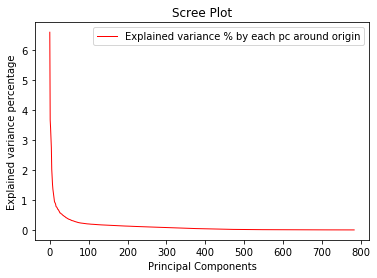

In [28]:
#sing_vals = np.arange(num_vars) + 1
plt.plot(explained_variance_proportion_variation_around_origin_for_each_pc*100, 'r-', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance percentage')
plt.legend(['Explained variance % by each pc around origin'], loc='best')

<h6>Cumulative Explained variance % by each Principal component around origin.</h6>

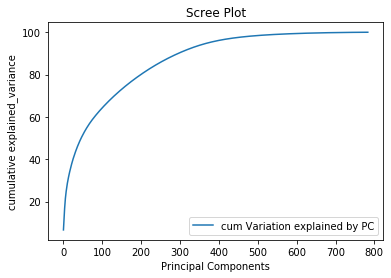

In [29]:
plt.plot(cum_exp_variance*100)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('cumulative explained_variance')
plt.legend(['cum Variation explained by PC'], loc='best')

<h6>Eigen value/Amount of variance explained by each principal component.</h6>

Text(0, 0.5, 'Eigen values')

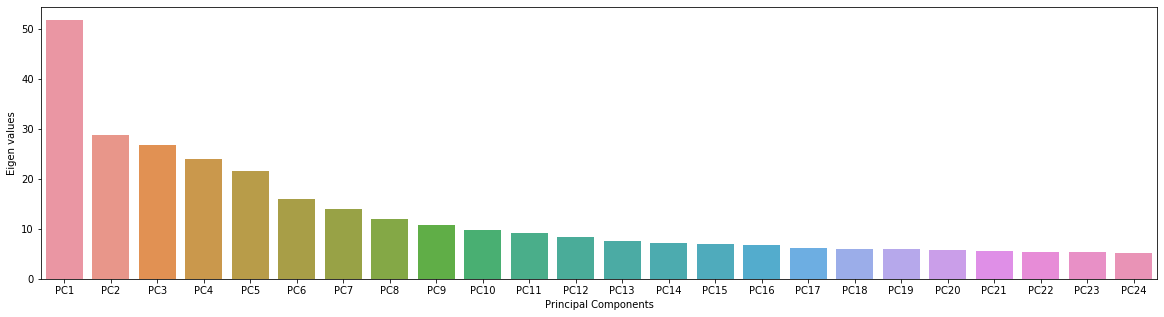

In [30]:
plt.figure(figsize=(20,5))
val=values[0]
j=[]
for i in range(1,25):
    j.append('PC'+str(i))
p=pd.DataFrame(j,columns=['1'])
val=values[:25]
bar_df=pd.concat([val,p],axis=1)

sns.barplot(x='1',y=val[0],data=bar_df)
plt.xlabel('Principal Components')
plt.ylabel('Eigen values')


<h6>Eigen value scree plot </h6>

Text(0.5, 1.0, 'EIgen Value scree plot')

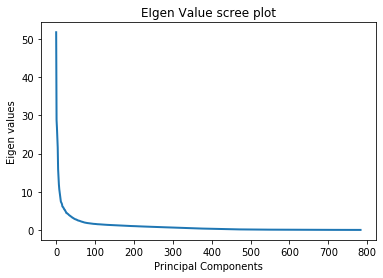

In [31]:
plt.plot(values, linewidth=2, markersize=12)
plt.xlabel('Principal Components')
plt.ylabel('Eigen values')
plt.title('EIgen Value scree plot')

<h6>Checking lambda>1 for how many values.</h6>

In [32]:
values_more_than_1=values>1

In [33]:
values_more_than_1 = values_more_than_1.rename(columns={0: 'a'})

In [34]:
values_more_than_1.a.value_counts()

False    585
True     199
Name: a, dtype: int64

<h1>Discussing Good cut-off</h1>

<h2>1. Scree Plots: Criteria-1</h2>
<h3>a)Eigen value scree plot--></h3>
<p>On visualizing the scree plot and using the elbow method to determine the number of principal components, we see that there is a big drop when PC=50(approximately). If we choose these number of components then the variance explained by our model is roughly around 40% which will be a drastic model. If we choose the point where the line becomes constant, then the number of components would be approximately 200 which suggests a good variance of around 80%.</p>
<h3>b)Explained variance % scree plot--></h3>
<p>Same is the case with this plot as we are just finding the variance % explained by each P.C-->eigen.val/sum(eigen.val).</p>
<h6>RESULT: we choose Number of components=200 (approximately)</h6>

<p></p>

<h2>2. Eigen value>1: Criteria-2 </h2>
<p>If we choose the principal components with eigen values i.e variance explained by each principal component to be more than 1, then we end up taking exactly 199 components which will let our model explain the variance of around 80%. shown in the above cell.</p>
<h6>RESULT: we choose Number of components=199 or 200.</h6>

<p></p>

<h2>3. Cumulative explained variance: Criteria-3 </h2>
<p>If we want to have our model explain 80% of the total variance, then we simply analyze the Cumulative plot and find out that around 200 components will explain this much variance. Also, if we look the values of our variable "cum_exp_variance", it suggests 80% variance explained at No_components=200. </p>
<h6>RESULT: we choose Number of components=200.</h6>


<h6>Citations:</h6>
<p>1. https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22</p>
<p>2. https://ro-che.info/articles/2017-12-11-pca-explained-variance</p>
<p>3.https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained</p>

<h1> Part 2: subplots::=></h1>

In [35]:
pca=PCA(20)
pca_transformed1=pca.fit_transform(df_features_znorm)

In [36]:
pca_transformed1

array([[ 9.97069223, -6.18172062, -4.99286135, ..., -0.69373135,
        -1.1601097 ,  1.45042368],
       [11.41599975, -6.94158881, -5.06303443, ...,  0.17989547,
        -0.51211917,  0.16463441],
       [ 3.69011914, -4.69310042, -2.90865912, ...,  3.14749288,
         1.07171358,  4.42777009],
       ...,
       [-0.34942149, -0.9336773 ,  8.10744327, ..., -1.66920137,
        -1.20916765, -0.79560088],
       [-3.11526322, -2.09047048,  6.27252244, ..., -1.07402893,
        -0.33641313, -1.47238565],
       [-5.64409377,  0.24616446,  4.14018274, ...,  3.426435  ,
         0.59625527,  3.08214847]])

In [37]:
final_data_components=pd.DataFrame(pca_transformed1)

In [38]:
# pca_transformed1.components_

In [39]:
final_data_components=pd.concat([final_data_components, df_full[['gnd']]], axis = 1)

In [40]:
final_data_components

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,gnd
0,9.970692,-6.181721,-4.992861,-4.394894,-2.777859,-2.844865,1.276250,1.465378,6.872096,-0.387907,...,0.762848,0.458938,0.282984,3.342473,0.627362,1.033357,-0.693731,-1.160110,1.450424,0
1,11.416000,-6.941589,-5.063034,-4.242167,-1.844953,-0.146294,1.683077,2.973201,6.209479,-1.440728,...,0.117849,-0.945585,-1.693616,3.617670,0.291235,0.967980,0.179895,-0.512119,0.164634,0
2,3.690119,-4.693100,-2.908659,3.935115,-6.811775,-3.226263,3.663473,5.407368,3.412483,3.027760,...,2.149377,0.271014,1.022515,-3.200749,0.241169,1.133456,3.147493,1.071714,4.427770,0
3,7.312408,-6.042890,-3.648012,3.506946,-4.562449,-5.523816,3.972068,4.890343,6.805207,1.534002,...,2.524791,0.741606,2.028873,-1.779063,0.181222,1.787673,3.004669,-1.577952,2.860918,0
4,18.061520,-1.862430,-4.038829,-5.871645,-7.322167,4.442875,-2.186249,2.859818,2.549450,-1.476627,...,-3.574021,0.278857,-6.538798,2.320458,0.154948,1.360296,-1.189626,0.904593,2.262838,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,-1.917926,-0.397486,7.951742,0.162117,-2.170054,-2.309860,-3.861855,-3.854849,1.338098,-1.655431,...,-0.656339,2.560305,0.451539,0.747612,1.286501,-1.924805,-0.622884,-0.236718,-0.212718,4
2062,0.525752,2.646708,9.095311,0.969307,-2.257414,4.548021,-1.437043,-3.040765,-1.904779,2.898576,...,3.367702,2.252655,1.665549,-0.504136,-1.538146,2.278671,2.798395,0.454716,0.314595,4
2063,-0.349421,-0.933677,8.107443,0.824251,-2.814456,-2.822887,-3.678484,-3.033047,-1.521488,0.603968,...,0.508053,0.130250,1.137006,1.983673,-2.550342,2.449677,-1.669201,-1.209168,-0.795601,4
2064,-3.115263,-2.090470,6.272522,-1.529840,-0.036311,-2.586613,-2.099681,-0.086586,1.457709,-2.007604,...,-0.646772,1.382867,-0.842411,2.193184,-1.420735,0.818106,-1.074029,-0.336413,-1.472386,4


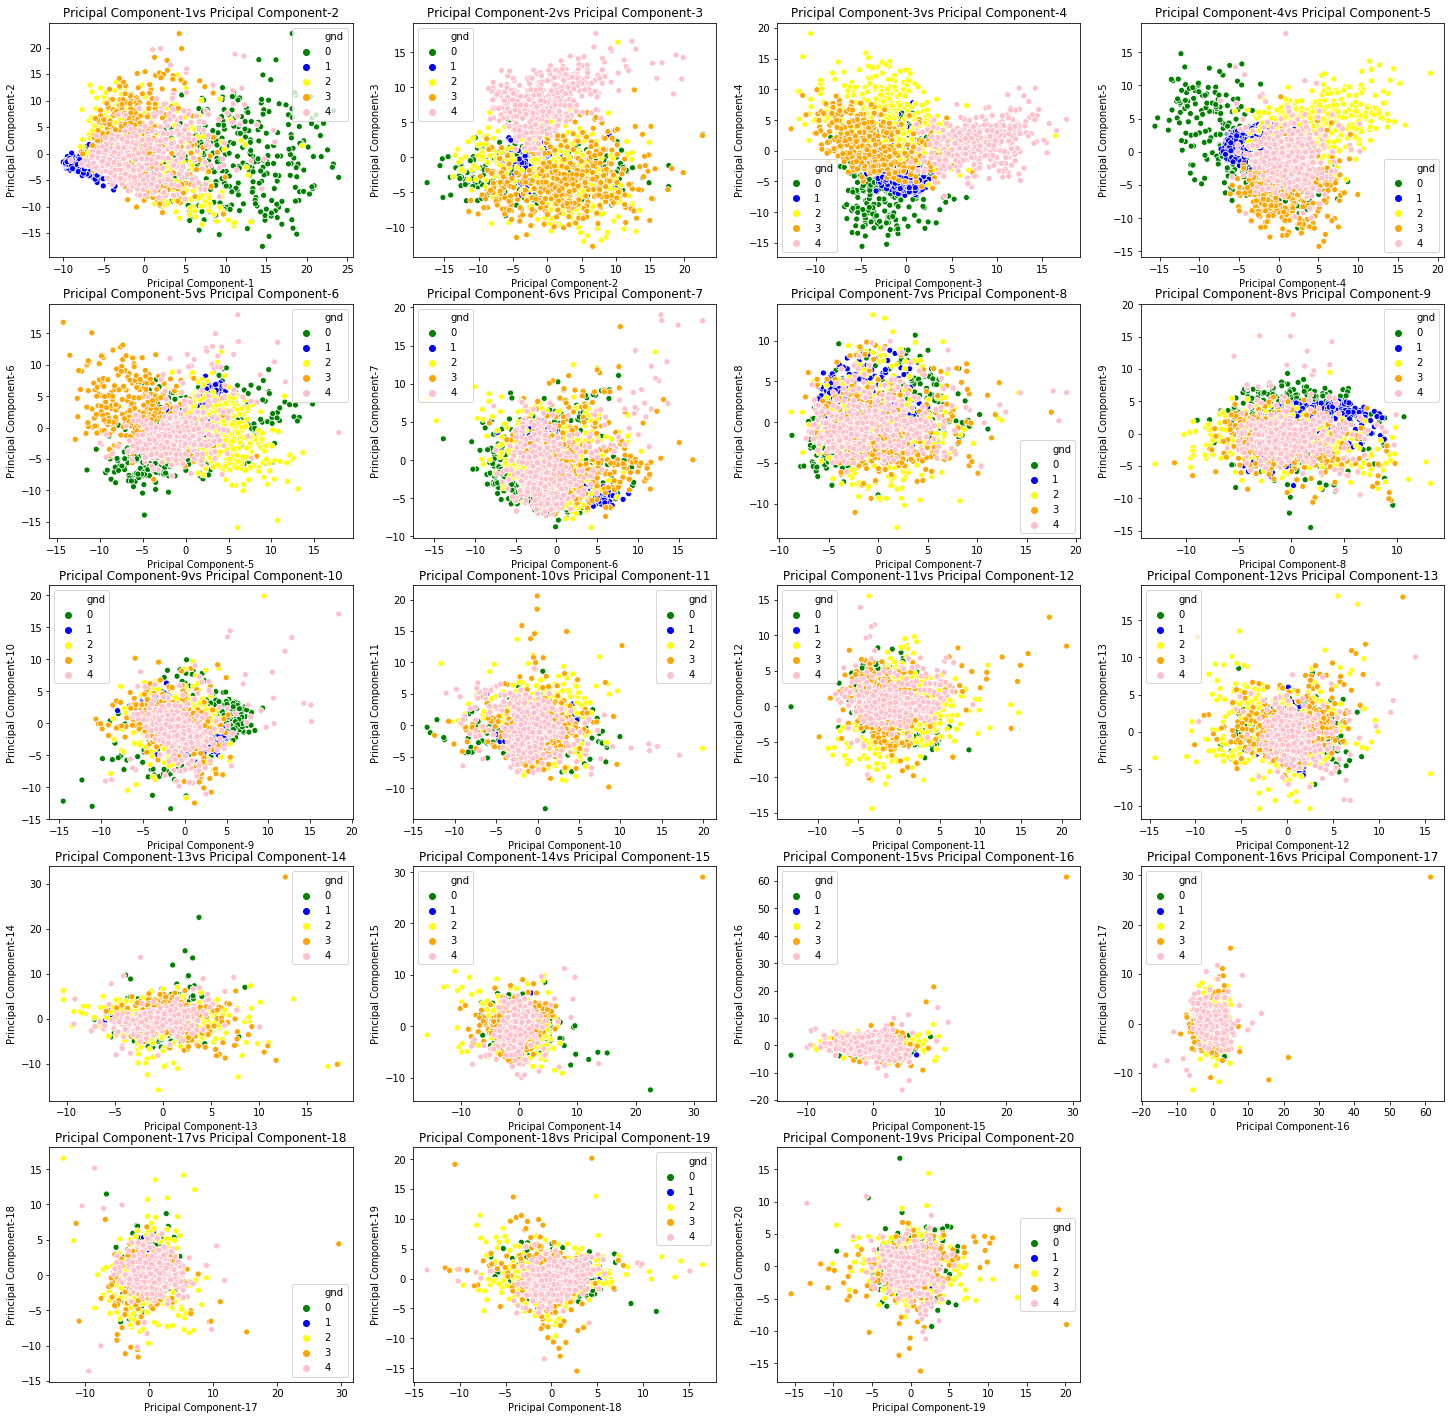

In [41]:
fig, axs = plt.subplots(5,4,figsize=(25,25))
k=0
fig.delaxes(axs[4][3])
for i in range(0,axs.shape[0]):
    for j in range(0,axs.shape[1]):
        sns.scatterplot(final_data_components[k], final_data_components[k+1],hue=final_data_components.gnd,legend='full',ax=axs[i,j],palette=['green','blue','yellow','orange','pink'])
        axs[i,j].set(xlabel='Pricipal Component-'+str(k+1),ylabel='Principal Component-'+str(k+2))
        
        axs[i,j].set_title('Pricipal Component-'+str(k+1)+'vs Pricipal Component-'+str(k+2))
        
        if i==4 and j==2:
            break;
        k=k+1;

In [42]:
explained_variance_proportion_variation_around_origin_for_each_pc[0:15]

,0
0,0.066011
1,0.036718
2,0.034130
3,0.030509
4,0.027506
5,0.020263
6,0.017672
7,0.015187
8,0.013592
9,0.012524


In [43]:
corn1_g=final_data_components[[0,1,2,3,4,5,6,7,8,'gnd']].corr()


In [44]:
cor=corn1_g['gnd']

In [45]:
print("Correlation with class label::\n\n")
cor

Correlation with class label::




0     -0.194708
1      0.156830
2      0.505208
3      0.398520
4     -0.251002
5      0.095011
6     -0.001216
7     -0.111017
8     -0.240323
gnd    1.000000
Name: gnd, dtype: float64

<h1>ANALYSIS: Dimensional cutoff</h1>
<h2>PC1 VS PC2::=></h2>
<p>1. Visually ::=>Variation between the data points is maximum. There is very less overlapping. </p>
<p>2. Amount of variance explained by each principal component is highest in case of pc1 and pc2 and the highest eigen values as well which is obvious.</p>
<p>3. Var_explained(PC1):6.6% , Var_explained(PC2):3.6% . Total explained variance by both the PC's: around 10%.
<p>4. Although separation between the classes is not a parameter which PCA considers, but I have found out that correlation betweeen the class and the PC1 is 0.19, and the corr between PC2 and class is 0.15.</p>

<h2>PC2 VS PC3::=></h2>
<p>1. Visually ::=>Variation between the data points is high with class 0 getting overlapped.</p>
<p>2. Amount of variance explained by each principal component in case of pc2 and pc3 is fair enough(Not too low).</p>
<p>3. Var_explained(PC2):3.36% , Var_explained(PC3):3.4% . Total explained variance by both the PC's: around 6.76%.
<p>4. Although separation between the classes is not a parameter which PCA considers, but correlation betweeen the class and the PC2 is 0.09, and the corr between PC3 and class is 0.0012.</p>

<h2>PC5 VS PC6::=></h2>
<p>1. Visually ::=>Variation between the data points is not too high with class 1 getting overlapped.</p>
<p>2. Amount of variance explained by each principal component in case of pc5 and pc6 is around 5%.</p>
<p>3. Var_explained(PC5):2.70% , Var_explained(PC6):2.0% . Total explained variance by both the PC's: around 4.70%.
<p>4. Correlation betweeen the class and the PC5 is 0.25, and the corr between PC6 and class is 0.09 which is good enough and same as that provided by pc1 and pc2.
</p>

<h2>PC6 VS PC7::=></h2>
<p>1. Visually ::=>Variation between the data points is low with class 0 getting distored and spreaded.</p>
<p>2. Amount of variance explained by each principal component in case of pc6 and pc7 is around 3.7%.</p>
<p>3. Var_explained(PC6):2.0% , Var_explained(PC7):1.7% . Total explained variance by both the PC's: around 3.70%.
<p>4. Correlation betweeen the class and the PC6 is 0.09, and the corr between PC7 and class is 0.0012 which is too low.</p>
<h3>RESULT:==></h3>
<p>1.On comparing all the parameters (Visual cutoff, class separation, explained variance, eigen values,correlation between the component and the class), we have concluded that till PC5 and PC6, there is a good separability. After which explained variance and all the other parameters start to deteriorate as well as we can see from the plots. PC7 and PC8 overlaps the classes 0,2,3 with explained variance of only 3.2%
<p>2. On comparing with the previous analysis, we find out that that if we want to achieve a variance of around 80% then we need to have 200 components approximately. And the total variance explained by the 6 components is around 21%. ALl the other components after this, comtribute very little to the explained variance which can be seen by our variable "cum_exp_variance".</p>

<h1>3. PCA 1 vs PCA 2 AND PCA 5 vs PCA 6 => Explain the results versus the known classes and compare between
the two plots. </h1>

Text(0.5, 1.0, 'PCA1 VS PCA2')

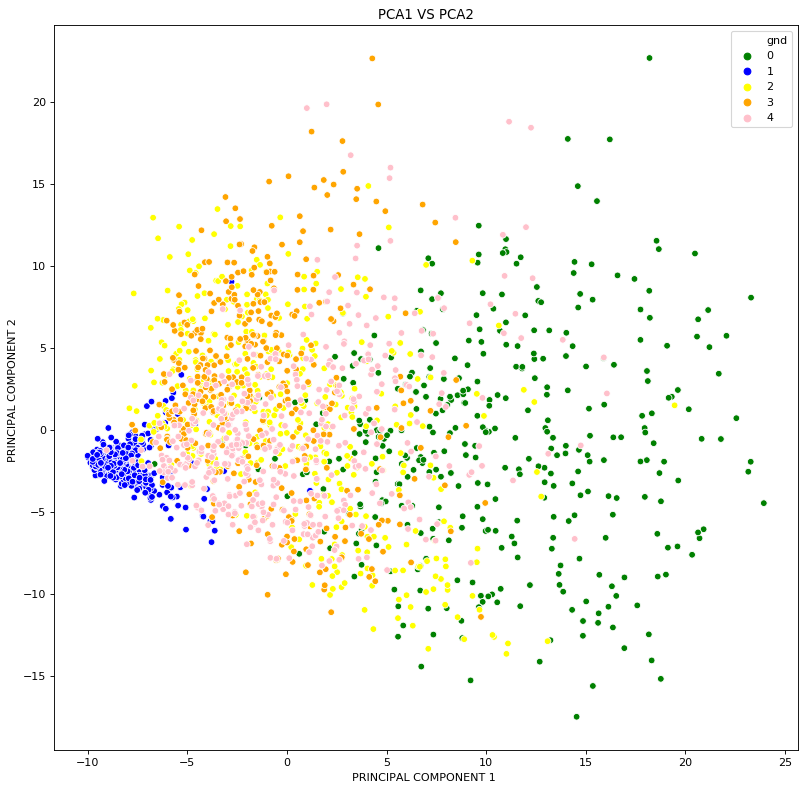

In [46]:
fig2=plt.figure(figsize=(12,12), dpi= 80, facecolor='w', edgecolor='k')
sns.scatterplot(final_data_components[0],final_data_components[1],hue=final_data_components.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel("PRINCIPAL COMPONENT 1 ")
plt.ylabel("PRINCIPAL COMPONENT 2 ")
plt.title("PCA1 VS PCA2")

Text(0.5, 1.0, 'PCA5 VS PCA6')

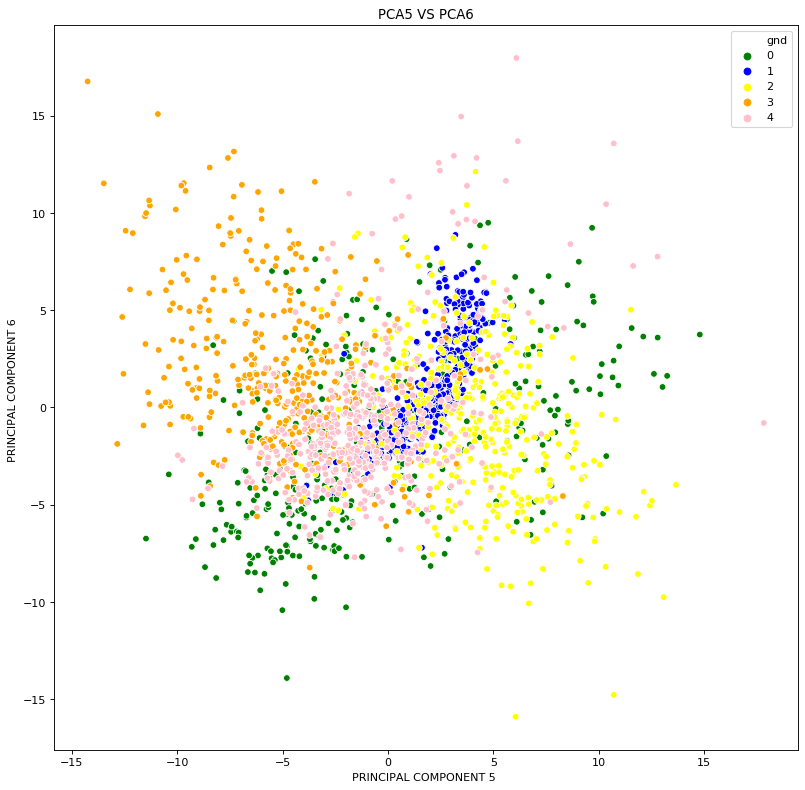

In [47]:
#2.2.1.3
fig3=plt.figure(figsize=(12,12), dpi= 80, facecolor='w', edgecolor='k')
sns.scatterplot(final_data_components[4],final_data_components[5],hue=final_data_components.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel("PRINCIPAL COMPONENT 5 ")
plt.ylabel("PRINCIPAL COMPONENT 6 ")
plt.title("PCA5 VS PCA6")

<h1>ANALYSIS ::=></h1>

<h2>PC1 VS PC2:: RESULTS VERSUS KNOWN CLASSES=></h2>

<h5>1. Visually ::=></h5>
<p>1.class 0: There is no cluster being formed for class 0 and there is no overlapping as well.</p>
<p>2.class 1: It is clearly custered and well separated.</p>
<p>3.class [2,3,4]: These classes are getting overlapped with each other.</p>
<h6>RESULT :=>The amount of variance explained by each PC is maximum as compared to other components(Var_explained(PC1):6.6% ,Var_explained(PC2):3.6%) because these two combined covers the maximum explained variance. As PCA doesn't take class labels into account, so the overlapping of the classes is compromised in the plots.(correlation betweeen the class and the PC1: 0.19, and the correlation between PC2 and class: 0.15.)</h6>


<h2>PC5 VS PC6:: RESULTS VERSUS KNOWN CLASSES=></h2>

<h5>1. Visually ::=></h5>
<p>1.class 0: This is distorted and heavily spread.</p>
<p>2.class 1: This class is overlapped by [2,4].</p>
<p>3.class [3]: This is somehow separated.</p>
<h6>RESULT :=>The amount of variance explained by each PC (Var_explained(PC5):2.70% , Var_explained(PC6):2.0%) which is comparatively bad than PC1 and PC2.Correlation betweeen the class and the PC5: 0.25, and the correlation between PC6 and class: 0.09.)</h6>

<h3>COMPARISON BETWEEN THE TWO PLOTS:==></h3>
<p>1.Class 1 is getting clearly separated in [PC1,PC2] plot, whereas class 1 is getting overlapped in [PC5,PC6].</p>
<p>2.In [PC1,PC2]-> class 0 is also separated with little bit of spread whereas in [PC5,PC6], it is distoreted and overlapped.</p>
<p>3.Overall correlation between [PC1,class]+[PC2,class] is same as [PC5,class]+[PC6,class] which is 0.34.</p>
<p>4.Overall explained_variance[PC1,PC2]={10.2%} and explained_variance[PC5,PC6]={4.7%} which shows data points are well varied in PC1,PC2 plot which can be seen in the plots because the variance explained by each of them is highest.</p>

<h1>4) PCA AND DUAL PCA</h1>

In [48]:
import timeit
start = timeit.default_timer()

In [49]:
#finding cov matrix for features. i.e d*d
# covariance_matrix_manual=np.cov(df_features_znorm.T) # transpose of dataset i.e features on rows side. equivalent to AT.A i.e on doing eig , vector it gives is right singular vector feature ke along 
# covariance_matrix_manual1=pd.DataFrame(covariance_matrix_manual)
# df_features_znorm_transpose=np.transpose(df_features_znorm)
df_features_znorm_transpose=df_features_znorm.T
df_features_znorm_np=df_features_znorm.to_numpy()
df_features_znorm_np_T=df_features_znorm_transpose.to_numpy()

In [50]:
#finding cov matrix at*a --> gives us U i.e features*features 784*784
cov_mat1=np.matmul(df_features_znorm_np_T,df_features_znorm_np)
# cov_mat1=cov_mat1/(df_full.shape[0]-1) # also not feasible for pca projection dont do BECAUSE OF COMPARISON WITH S GIVEN BY NUMPY SVD (IT DOESNT DIVIDE VALUES BY N-1).
values_pca1, vectors_pca1= np.linalg.eig(cov_mat1) 
#vectors_pca1 #U unsorted 784*784

In [51]:
vectors_pca1

array([[-0.00197863,  0.00493308, -0.00037529, ..., -0.00013358,
        -0.00062295, -0.00157864],
       [-0.00151307, -0.00640373,  0.00258725, ...,  0.00274212,
        -0.00837347,  0.0063992 ],
       [ 0.00049178, -0.00156563, -0.00372451, ...,  0.00445827,
         0.00683485, -0.00181313],
       ...,
       [ 0.0001125 ,  0.00300533, -0.00335936, ...,  0.00245866,
        -0.00039547,  0.00083265],
       [ 0.00132315,  0.00947149,  0.00553066, ..., -0.01026383,
        -0.01070597,  0.01537859],
       [-0.00591181,  0.00287621,  0.00624184, ...,  0.00383851,
        -0.00246361,  0.00327846]])

In [52]:
# #finding cov matrix a*at  --> gives us U when passed into eigh i.e observations*observations 2066*2066
# cov_mat=np.matmul(df_features_znorm_np,df_features_znorm_np_T)
# cov_mat=cov_mat/(df_full.shape[0]-1)
# values_pca, vectors_pca = np.linalg.eigh(cov_mat)
# #vectors_pca #u sorted 2066*2066
# cov_mat=pd.DataFrame(cov_mat)
# # cov_mat
# sorted_values2 = np.argsort(values_pca)[::-1]
# vectors_pca = vectors_pca[:,sorted_values2]
# values_pca = values_pca[sorted_values2]
# values_pca=pd.DataFrame(values_pca)
# sorted_vectors2=pd.DataFrame(vectors_pca.T)
# v=sorted_vectors2
# v # equivalent to uh in svd

In [53]:
cov_mat1=pd.DataFrame(cov_mat1)
cov_mat1

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,2066.000000,-41.823743,57.874052,-57.199348,-6.523476,55.229393,-14.783244,-56.965862,-15.947594,-124.783401,...,16.200979,-79.639618,30.437065,-43.955629,78.335774,0.467566,-25.518658,1.264345,27.349291,65.592079
1,-41.823743,2066.000000,44.760228,-68.776377,-17.131647,97.521100,3.914803,6.667533,-73.412762,-9.367038,...,-52.249111,-18.795191,-33.044520,-2.727503,84.302036,41.243121,-27.541538,-20.144299,74.631377,-37.354962
2,57.874052,44.760228,2066.000000,0.991612,-46.487979,-19.050772,-34.701012,-12.244526,34.098989,-14.115328,...,-61.740792,-4.020996,79.373323,24.753960,39.237115,98.016048,41.750798,12.484072,-57.230211,64.114544
3,-57.199348,-68.776377,0.991612,2066.000000,16.739481,-20.104114,-62.806372,19.766748,15.191993,-20.635871,...,-54.930286,104.766005,17.045839,91.785870,75.435258,15.180252,-8.986629,-14.431025,11.942206,-6.604229
4,-6.523476,-17.131647,-46.487979,16.739481,2066.000000,-97.356457,-104.750265,22.699869,1.211784,44.774259,...,68.774549,-33.721779,18.924817,21.005670,-86.074882,20.994929,68.180045,-12.729503,14.714233,3.782801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.467566,41.243121,98.016048,15.180252,20.994929,-30.593971,17.570093,11.208589,32.752448,32.298174,...,-3.945780,17.021544,58.721159,-48.187253,74.887362,2066.000000,27.039876,30.565753,0.919666,86.505965
780,-25.518658,-27.541538,41.750798,-8.986629,68.180045,-64.300539,-21.734513,-6.370684,6.530821,29.138144,...,-20.762537,-38.658177,9.302504,-76.599877,25.694892,27.039876,2066.000000,16.101559,21.358591,-18.059469
781,1.264345,-20.144299,12.484072,-14.431025,-12.729503,-11.266006,40.744245,-40.971101,-33.459917,-24.855153,...,-30.617737,-0.832698,10.853715,-27.085448,0.612163,30.565753,16.101559,2066.000000,-22.976272,-20.376014
782,27.349291,74.631377,-57.230211,11.942206,14.714233,-0.216029,41.312080,-39.054459,21.394897,-6.370854,...,11.983636,-57.333893,22.764622,-0.996303,63.301124,0.919666,21.358591,-22.976272,2066.000000,29.818573


###### -sorting the vectors and values -

In [54]:
# sorted_values3 = np.argsort(values_pca1)[::-1]
# vectors_pca1 = vectors_pca1[:,sorted_values3]
# values_pca1 = values_pca1[sorted_values3]
# values_pca1=pd.DataFrame(values_pca1)
# sorted_vectors3=pd.DataFrame(vectors_pca1.T)
# u=sorted_vectors3

In [55]:
u=vectors_pca1 #equivalent to vh in svd

In [56]:
u

array([[-0.00197863,  0.00493308, -0.00037529, ..., -0.00013358,
        -0.00062295, -0.00157864],
       [-0.00151307, -0.00640373,  0.00258725, ...,  0.00274212,
        -0.00837347,  0.0063992 ],
       [ 0.00049178, -0.00156563, -0.00372451, ...,  0.00445827,
         0.00683485, -0.00181313],
       ...,
       [ 0.0001125 ,  0.00300533, -0.00335936, ...,  0.00245866,
        -0.00039547,  0.00083265],
       [ 0.00132315,  0.00947149,  0.00553066, ..., -0.01026383,
        -0.01070597,  0.01537859],
       [-0.00591181,  0.00287621,  0.00624184, ...,  0.00383851,
        -0.00246361,  0.00327846]])

In [57]:
u.shape

(784, 784)

In [58]:
df_features_znorm.shape

(2066, 784)

In [59]:
s=np.sqrt(values_pca1)

In [60]:
s=pd.DataFrame(s)

In [61]:
s

,0
0,326.986490
1,243.872478
2,235.121097
3,222.297469
4,211.074528
...,...
779,7.451470
780,6.586566
781,7.404827
782,7.017413


In [62]:
df_features_znorm

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.010077,0.966782,0.359594,-1.668004,-1.638671,1.007994,-0.324102,-0.992537,0.983784,-0.981814,...,-1.003413,-0.987770,0.314967,-1.650964,1.025781,-0.332975,-1.009889,-1.034285,1.047333,1.649643
1,1.687176,-1.029924,1.026488,0.336317,-0.976018,0.340307,1.674690,-0.992537,0.983784,1.005542,...,0.318686,-0.987770,-1.004957,0.340991,0.364131,-1.001515,0.313988,0.307104,1.702034,0.984636
2,-1.021220,0.301213,-1.641090,0.336317,-0.976018,-0.995067,-1.656630,-0.992537,-1.679168,-0.319362,...,0.979735,0.356586,-1.664918,-0.322994,1.025781,-0.332975,-0.347950,-1.034285,-0.262071,0.984636
3,1.687176,0.301213,-0.307301,0.336317,1.674594,-0.327380,-0.324102,-1.648724,0.983784,1.667994,...,0.979735,1.700943,0.974929,1.668962,-0.959168,1.004104,0.975927,-0.363590,1.047333,0.984636
4,0.332978,1.632350,0.359594,0.336317,-1.638671,1.007994,-0.990366,-0.992537,0.983784,0.343090,...,-1.003413,-0.987770,0.314967,0.340991,0.364131,-1.001515,-0.347950,0.977798,-0.916772,-1.010386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1.010077,-1.695492,0.359594,-1.668004,1.011941,-1.662753,1.008426,0.319835,-1.013430,-0.319362,...,0.318686,-1.659949,-1.004957,1.004977,1.687430,1.004104,-0.347950,-0.363590,-0.262071,-0.345379
2062,-0.344121,-0.364355,0.359594,1.004424,-0.313365,-0.995067,-0.324102,0.319835,0.318046,1.005542,...,-1.003413,1.028765,-1.664918,-0.986979,0.364131,1.004104,-1.671828,-0.363590,0.392631,-0.345379
2063,-0.344121,0.301213,-0.307301,0.336317,-0.976018,-0.327380,1.674690,1.632208,1.649523,-1.644266,...,0.318686,1.700943,-1.004957,-0.986979,-0.297518,1.672643,-0.347950,-1.034285,-0.916772,0.319628
2064,1.687176,-0.364355,1.026488,0.336317,-0.976018,-1.662753,0.342162,-0.336351,-0.347692,-0.981814,...,-0.342363,0.356586,-0.344995,0.340991,-0.959168,1.004104,-0.347950,0.977798,0.392631,0.984636


In [63]:
proj_pca_=np.dot(u.T,df_features_znorm_np_T)

In [64]:
proj_pca=pd.DataFrame(proj_pca_)

###### Projected data is found using utxt or ut.x

In [65]:
proj_pca.T

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-9.970692,6.181722,-4.992863,4.394879,2.777870,-2.844761,1.276232,1.463996,6.873987,0.380145,...,-0.238965,-0.174434,-0.063875,0.144179,-0.016838,-0.305572,-0.367128,-0.161696,-0.216680,0.172986
1,-11.416000,6.941587,-5.063029,4.242178,1.844940,-0.146431,1.683401,2.974999,6.208794,1.453125,...,-0.091849,0.122296,0.338588,-0.304807,0.129783,0.415979,0.003514,-0.089041,0.052306,0.155035
2,-3.690119,4.693097,-2.908656,-3.935094,6.811806,-3.226107,3.662990,5.408198,3.404675,-3.016744,...,0.245613,0.328015,-0.053017,0.144339,-0.051235,-0.157361,0.043592,-0.358180,-0.136018,0.392830
3,-7.312408,6.042886,-3.648012,-3.506919,4.562468,-5.523882,3.971637,4.891807,6.798005,-1.518705,...,0.084601,0.125446,0.165907,0.042049,-0.130213,-0.150309,0.031510,0.204685,0.043917,0.005610
4,-18.061520,1.862436,-4.038834,5.871621,7.322140,4.443076,-2.186078,2.857345,2.555258,1.458920,...,0.087922,-0.120053,0.003976,0.062770,0.204165,-0.138981,0.183865,0.027830,0.000787,0.060918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1.917926,0.397488,7.951743,-0.162132,2.170046,-2.309800,-3.861676,-3.855531,1.341427,1.648366,...,-0.129211,-0.185156,-0.150304,-0.237013,0.142082,0.267622,-0.079502,-0.278115,0.008623,0.205372
2062,-0.525752,-2.646714,9.095319,-0.969272,2.257428,4.547903,-1.437164,-3.038324,-1.912510,-2.876039,...,-0.248852,0.063364,-0.039991,-0.003009,-0.075922,-0.164902,-0.031096,-0.059737,-0.151381,0.060834
2063,0.349422,0.933681,8.107442,-0.824268,2.814438,-2.822867,-3.678327,-3.033837,-1.516991,-0.611697,...,0.188375,-0.069053,-0.077289,-0.238641,0.011053,-0.025430,-0.024921,0.017915,0.222807,0.093793
2064,3.115263,2.090474,6.272519,1.529823,0.036308,-2.586437,-2.099663,-0.088302,1.460697,1.994810,...,-0.139166,0.386462,0.094866,-0.243930,-0.010567,0.260643,0.173119,0.137496,0.098326,0.198805


###### Reconstruction  ut.yt or u.y

In [66]:
X_hat=np.dot(u,proj_pca)

In [67]:
X_hat=pd.DataFrame(X_hat)

In [68]:
X_hat.T

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1.010077,0.966782,0.359594,-1.668004,-1.638671,1.007994,-0.324102,-0.992537,0.983784,-0.981814,...,-1.003413,-0.987770,0.314967,-1.650964,1.025781,-0.332975,-1.009889,-1.034285,1.047333,1.649643
1,1.687176,-1.029924,1.026488,0.336317,-0.976018,0.340307,1.674690,-0.992537,0.983784,1.005542,...,0.318686,-0.987770,-1.004957,0.340991,0.364131,-1.001515,0.313988,0.307104,1.702034,0.984636
2,-1.021220,0.301213,-1.641090,0.336317,-0.976018,-0.995067,-1.656630,-0.992537,-1.679168,-0.319362,...,0.979735,0.356586,-1.664918,-0.322994,1.025781,-0.332975,-0.347950,-1.034285,-0.262071,0.984636
3,1.687176,0.301213,-0.307301,0.336317,1.674594,-0.327380,-0.324102,-1.648724,0.983784,1.667994,...,0.979735,1.700943,0.974929,1.668962,-0.959168,1.004104,0.975927,-0.363590,1.047333,0.984636
4,0.332978,1.632350,0.359594,0.336317,-1.638671,1.007994,-0.990366,-0.992537,0.983784,0.343090,...,-1.003413,-0.987770,0.314967,0.340991,0.364131,-1.001515,-0.347950,0.977798,-0.916772,-1.010386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1.010077,-1.695492,0.359594,-1.668004,1.011941,-1.662753,1.008426,0.319835,-1.013430,-0.319362,...,0.318686,-1.659949,-1.004957,1.004977,1.687430,1.004104,-0.347950,-0.363590,-0.262071,-0.345379
2062,-0.344121,-0.364355,0.359594,1.004424,-0.313365,-0.995067,-0.324102,0.319835,0.318046,1.005542,...,-1.003413,1.028765,-1.664918,-0.986979,0.364131,1.004104,-1.671828,-0.363590,0.392631,-0.345379
2063,-0.344121,0.301213,-0.307301,0.336317,-0.976018,-0.327380,1.674690,1.632208,1.649523,-1.644266,...,0.318686,1.700943,-1.004957,-0.986979,-0.297518,1.672643,-0.347950,-1.034285,-0.916772,0.319628
2064,1.687176,-0.364355,1.026488,0.336317,-0.976018,-1.662753,0.342162,-0.336351,-0.347692,-0.981814,...,-0.342363,0.356586,-0.344995,0.340991,-0.959168,1.004104,-0.347950,0.977798,0.392631,0.984636


In [69]:
df_features_znorm

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.010077,0.966782,0.359594,-1.668004,-1.638671,1.007994,-0.324102,-0.992537,0.983784,-0.981814,...,-1.003413,-0.987770,0.314967,-1.650964,1.025781,-0.332975,-1.009889,-1.034285,1.047333,1.649643
1,1.687176,-1.029924,1.026488,0.336317,-0.976018,0.340307,1.674690,-0.992537,0.983784,1.005542,...,0.318686,-0.987770,-1.004957,0.340991,0.364131,-1.001515,0.313988,0.307104,1.702034,0.984636
2,-1.021220,0.301213,-1.641090,0.336317,-0.976018,-0.995067,-1.656630,-0.992537,-1.679168,-0.319362,...,0.979735,0.356586,-1.664918,-0.322994,1.025781,-0.332975,-0.347950,-1.034285,-0.262071,0.984636
3,1.687176,0.301213,-0.307301,0.336317,1.674594,-0.327380,-0.324102,-1.648724,0.983784,1.667994,...,0.979735,1.700943,0.974929,1.668962,-0.959168,1.004104,0.975927,-0.363590,1.047333,0.984636
4,0.332978,1.632350,0.359594,0.336317,-1.638671,1.007994,-0.990366,-0.992537,0.983784,0.343090,...,-1.003413,-0.987770,0.314967,0.340991,0.364131,-1.001515,-0.347950,0.977798,-0.916772,-1.010386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1.010077,-1.695492,0.359594,-1.668004,1.011941,-1.662753,1.008426,0.319835,-1.013430,-0.319362,...,0.318686,-1.659949,-1.004957,1.004977,1.687430,1.004104,-0.347950,-0.363590,-0.262071,-0.345379
2062,-0.344121,-0.364355,0.359594,1.004424,-0.313365,-0.995067,-0.324102,0.319835,0.318046,1.005542,...,-1.003413,1.028765,-1.664918,-0.986979,0.364131,1.004104,-1.671828,-0.363590,0.392631,-0.345379
2063,-0.344121,0.301213,-0.307301,0.336317,-0.976018,-0.327380,1.674690,1.632208,1.649523,-1.644266,...,0.318686,1.700943,-1.004957,-0.986979,-0.297518,1.672643,-0.347950,-1.034285,-0.916772,0.319628
2064,1.687176,-0.364355,1.026488,0.336317,-0.976018,-1.662753,0.342162,-0.336351,-0.347692,-0.981814,...,-0.342363,0.356586,-0.344995,0.340991,-0.959168,1.004104,-0.347950,0.977798,0.392631,0.984636


##### RESULT ::=> 
###### 1.Reconstruction is done.
###### 2.The original dataset is equal to x_hat. (Reconstructed)
###### 3.Singular value s and singular vector u is also found which can be compared with implementation of svd.

In [70]:
stop = timeit.default_timer()
print('MODEL: ', stop - start)

Timetaken = pd.DataFrame(columns = ['Model', 'time'])
Timetaken = Timetaken.append({'Model':'PCA', 'time':stop-start},ignore_index=True)

MODEL:  3.7157768110000013


In [71]:
Timetaken

,Model,time
0,PCA,3.715777


In [72]:
print('SINGUALAR VALUES')
print(s)

SINGUALAR VALUES
              0
0    326.986490
1    243.872478
2    235.121097
3    222.297469
4    211.074528
..          ...
779    7.451470
780    6.586566
781    7.404827
782    7.017413
783    6.899872

[784 rows x 1 columns]


<h5>Using SVD to validate the above results only </h5>

In [73]:
import scipy

In [74]:
u, Sigma,v = np.linalg.svd(df_features_znorm,full_matrices=True)

In [75]:
Uh=pd.DataFrame(u)
Vh=pd.DataFrame(v)
Sigma=pd.DataFrame(Sigma)

In [76]:
Uh #equivalent to v in dual pca

,0,1,2,3,4,5,6,7,8,9,...,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065
0,0.030493,-0.025348,0.021235,0.019770,0.013161,-0.015703,0.007543,0.009334,-0.046328,-0.002669,...,0.019665,0.000804,0.006609,-0.001725,0.008927,-0.030701,0.024620,-0.003187,-0.040822,-0.011269
1,0.034913,-0.028464,0.021534,0.019083,0.008741,-0.000808,0.009950,0.018968,-0.041845,-0.010203,...,-0.020256,-0.018425,0.004079,-0.007270,0.008497,-0.016628,0.007769,0.015490,-0.000859,0.011863
2,0.011285,-0.019244,0.012371,-0.017702,0.032272,-0.017808,0.021650,0.034482,-0.022946,0.021181,...,0.039119,0.017862,0.007897,0.023423,0.027247,0.023300,-0.021480,-0.017086,0.010533,-0.036169
3,0.022363,-0.024779,0.015515,-0.015776,0.021615,-0.030491,0.023475,0.031190,-0.045816,0.010663,...,-0.005707,-0.012247,0.050850,0.000732,0.034708,0.030766,-0.003631,-0.006657,-0.040735,0.027420
4,0.055236,-0.007637,0.017178,0.026413,0.034690,0.024525,-0.012921,0.018218,-0.017221,-0.010243,...,-0.028641,0.009377,0.014940,-0.025289,0.020609,0.030926,0.007756,-0.009465,-0.030056,0.007465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,-0.005865,-0.001630,-0.033820,-0.000729,0.010281,-0.012750,-0.022825,-0.024583,-0.009041,-0.011573,...,0.025726,0.017611,0.007735,-0.036231,-0.002609,0.698346,-0.010842,0.006868,-0.022316,-0.012024
2062,0.001608,0.010853,-0.038684,-0.004360,0.010695,0.025104,-0.008494,-0.019372,0.012890,0.020193,...,0.007500,0.003623,0.012862,0.008733,0.003011,-0.007728,0.622909,-0.032481,0.007951,-0.016233
2063,-0.001069,-0.003829,-0.034482,-0.003708,0.013334,-0.015582,-0.021741,-0.019344,0.010224,0.004295,...,-0.007417,-0.012819,-0.005602,0.012213,-0.004211,0.011214,-0.028137,0.713983,0.008089,0.005752
2064,-0.009527,-0.008572,-0.026678,0.006882,0.000172,-0.014277,-0.012410,-0.000563,-0.009844,-0.014006,...,0.012571,0.008147,0.002640,-0.002310,0.019553,-0.028132,0.007207,0.010848,0.640821,0.037386


In [77]:
Vh #equivalent to u in pca

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.001979,0.001513,-0.000492,-0.003617,-0.000810,0.005896,-0.001439,-0.001285,-0.004915,-0.002636,...,-0.002642,-0.000678,0.001724,-0.001867,0.006185,0.002179,-0.003063,-0.000112,-0.001323,0.005912
1,-0.004933,0.006404,0.001566,-0.000518,0.002937,0.003685,0.008790,-0.000596,0.000131,0.004207,...,0.004506,0.001961,-0.004526,-0.003306,0.007419,0.004995,0.005274,-0.003005,-0.009471,-0.002876
2,0.000375,-0.002587,0.003725,-0.000352,0.001220,0.000092,0.002634,-0.005623,0.000141,0.000913,...,0.000357,-0.004578,-0.003625,-0.006495,-0.004720,-0.002290,-0.010619,0.003359,-0.005531,-0.006242
3,-0.006154,-0.002790,0.003226,0.002489,-0.010679,-0.000604,0.001788,0.003557,0.000985,-0.000627,...,-0.012484,0.006529,-0.003851,0.008501,0.003250,0.005949,0.001025,-0.003811,0.001099,-0.003276
4,0.003251,-0.003767,-0.001384,0.000363,0.001331,-0.008793,-0.002887,-0.007900,0.000897,0.004340,...,-0.001125,0.004288,-0.004768,0.000073,-0.006416,-0.002894,-0.003249,-0.001388,0.002603,0.000526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.000990,-0.002825,-0.002969,-0.007797,-0.005491,-0.001475,-0.001826,-0.004143,0.001448,0.000428,...,0.009246,-0.000368,0.002268,-0.001299,0.004408,0.006315,0.003715,0.000317,-0.000682,0.003505
780,0.003076,0.002147,-0.000022,-0.002503,-0.006257,0.003685,-0.000386,-0.003653,0.005720,0.002835,...,-0.002430,0.001780,0.003394,0.003258,-0.005086,0.011611,-0.000623,-0.001533,-0.002098,-0.002753
781,-0.002942,-0.001887,-0.008383,0.001179,0.004695,0.002205,0.002482,0.000407,0.002776,-0.001563,...,-0.002031,-0.001132,-0.005333,-0.000615,-0.003868,0.003041,0.000069,-0.000558,-0.001867,-0.000131
782,0.000692,-0.004045,-0.000907,-0.004380,-0.003882,0.000384,0.000257,-0.000715,0.002860,0.002597,...,-0.002138,0.003951,-0.005181,0.002072,0.008591,-0.001094,-0.000378,0.003195,0.000123,0.000540


In [78]:
Sigma

,0
0,326.986490
1,243.872478
2,235.121097
3,222.297469
4,211.074528
...,...
779,4.150039
780,4.101121
781,3.990520
782,3.919102


<h6>Dual PCA</h6> 

In [79]:
import timeit
start = timeit.default_timer()

In [80]:
#finding cov matrix a*at  --> gives us U when passed into eigh i.e observations*observations 2066*2066
cov_mat=np.matmul(df_features_znorm_np,df_features_znorm_np_T)
# cov_mat=cov_mat/(df_full.shape[0]-1)
values_pca, vectors_pca = np.linalg.eigh(cov_mat)
#vectors_pca #u sorted 2066*2066


In [81]:
cov_mat=pd.DataFrame(cov_mat)


In [82]:
sorted_values2 = np.argsort(values_pca)[::-1]
vectors_pca = vectors_pca[:,sorted_values2]
values_pca = values_pca[sorted_values2]
values_pca=pd.DataFrame(values_pca)
sorted_vectors2=pd.DataFrame(vectors_pca.T)
v=sorted_vectors2

In [83]:
v # equivalent to uh in svd

,0,1,2,3,4,5,6,7,8,9,...,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065
0,0.030493,0.034913,0.011285,0.022363,0.055236,0.046916,0.040937,0.021700,0.025205,0.018523,...,-0.007181,-0.015922,0.000245,0.011039,0.013068,-0.005865,0.001608,-0.001069,-0.009527,-0.017261
1,-0.025348,-0.028464,-0.019244,-0.024779,-0.007637,0.032482,-0.021805,0.042834,0.007392,-0.011815,...,0.029787,-0.006180,0.006221,-0.009050,0.015009,-0.001630,0.010853,-0.003829,-0.008572,0.001009
2,0.021235,0.021534,0.012371,0.015515,0.017178,0.004994,0.024493,0.007139,0.012666,0.021057,...,-0.036532,-0.030662,-0.019215,-0.027587,-0.048708,-0.033820,-0.038684,-0.034482,-0.026678,-0.017609
3,-0.019770,-0.019083,0.017702,0.015776,-0.026413,-0.033458,-0.011377,-0.031623,0.010811,0.000037,...,0.018931,0.009219,0.007047,0.009083,0.016046,0.000729,0.004360,0.003708,-0.006882,0.010072
4,0.013161,0.008741,0.032272,0.021615,0.034690,-0.004860,0.039286,-0.054772,0.054381,0.042146,...,-0.006526,0.006522,-0.008635,0.013454,0.016367,0.010281,0.010695,0.013334,0.000172,0.011736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,0.000000,0.020181,-0.006487,-0.024432,-0.044182,-0.084449,0.385945,-0.066391,-0.332653,-0.139076,...,-0.013029,0.005210,0.010046,0.028062,0.006710,-0.004652,0.001287,-0.018051,0.029858,-0.016866
2062,0.000000,0.002232,0.038900,-0.148384,0.137218,0.173324,0.038450,-0.248543,0.188144,-0.064241,...,-0.005689,-0.001234,-0.001098,-0.030208,-0.036504,-0.000975,0.000802,0.015646,-0.006942,-0.005108
2063,0.000000,0.012837,0.032139,-0.157285,0.087955,-0.082976,-0.152485,0.250372,-0.058801,-0.343344,...,0.012896,-0.044842,0.007759,0.043116,-0.018562,-0.024054,0.013212,0.004688,-0.015845,0.000191
2064,0.000000,0.007584,-0.049012,-0.124722,-0.103469,0.143160,-0.106512,0.177942,-0.117991,0.266419,...,0.003397,-0.018060,0.027608,0.012309,0.015473,0.001097,-0.014210,0.039322,0.002213,0.005113


In [84]:
s1=np.sqrt(values_pca[:784])
values_pca=values_pca.to_numpy()

In [85]:
s1

,0
0,326.986490
1,243.872478
2,235.121097
3,222.297469
4,211.074528
...,...
779,4.150039
780,4.101121
781,3.990520
782,3.919102


In [86]:
values_pca_list=values_pca.tolist()

In [87]:
values_pca.shape

(2066, 1)

In [88]:
flat_list = []
for sublist in values_pca_list:
    for item in sublist:
        flat_list.append(item)

In [89]:
flat_list

[106920.16459705515,
 59473.78546651998,
 55281.93027001767,
 49416.16484289528,
 44552.456335586045,
 32820.12934635171,
 28624.908751809486,
 24598.463283754376,
 22015.82883906395,
 20285.698577942545,
 18819.039266814736,
 17114.634137768484,
 15426.005914921076,
 14840.859475957686,
 14492.618776370831,
 13895.87853319045,
 12744.588611643063,
 12452.682943678847,
 12332.568618996762,
 11865.252721872037,
 11494.656874874578,
 11028.866103400273,
 10965.144799081558,
 10474.59816615751,
 10123.042920923264,
 9788.776585319629,
 9210.745699190167,
 9166.035977787553,
 9034.849403819424,
 8776.074334044573,
 8667.551374830231,
 8532.39818663617,
 8273.801850424565,
 8052.670661098706,
 7890.442375732005,
 7760.306615935903,
 7642.301127614923,
 7377.061645909894,
 7307.43054299972,
 7178.131797530683,
 6976.813060864306,
 6767.29018266696,
 6600.05224166115,
 6582.43694369389,
 6401.141612382335,
 6208.321960844764,
 6105.551174688178,
 6063.1133565912805,
 5878.382178508136,
 5792.

In [90]:
# a = np.array(values_pca)
values_pca_diag=np.diag(flat_list)

In [91]:
values_pca_diag.shape

(2066, 2066)

###### Projection 

In [92]:
proj_dual=np.dot(values_pca_diag,v.T)

In [93]:
proj_dual=pd.DataFrame(proj_dual)

In [94]:
proj_dual.T

,0,1,2,3,4,5,6,7,8,9,...,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065
0,3260.281652,2076.393804,623.869540,1105.095014,2460.912277,1539.799577,1171.826417,533.783096,554.919203,375.751541,...,4.754210e-14,1.083965e-13,-1.861841e-15,-9.105694e-14,-1.122003e-13,5.585116e-14,-1.597361e-14,1.215636e-14,1.106421e-13,2.222684e-13
1,-2710.230937,-1692.862034,-1063.848940,-1224.477082,-340.243865,1066.056449,-624.155385,1053.640655,162.730791,-239.682226,...,-1.971949e-13,4.207175e-14,-4.727337e-14,7.465298e-14,-1.288669e-13,1.552001e-14,-1.078192e-13,4.355315e-14,9.954910e-14,-1.299809e-14
2,2270.480054,1280.691083,683.886484,766.714552,765.307684,163.901848,701.098648,175.608498,278.858866,427.155697,...,2.418461e-13,2.087457e-13,1.460185e-13,2.275682e-13,4.182032e-13,3.220334e-13,3.843070e-13,3.922619e-13,3.098173e-13,2.267468e-13
3,-2113.839617,-1134.958492,978.596760,779.579273,-1176.779627,-1098.110446,-325.672165,-777.872262,238.004263,0.745625,...,-1.253242e-13,-6.276278e-14,-5.355042e-14,-7.492848e-14,-1.377668e-13,-6.944856e-15,-4.331749e-14,-4.218109e-14,7.992117e-14,-1.296923e-13
4,1407.134811,519.842858,1784.060639,1068.151909,1545.517344,-159.517604,1124.557419,-1347.315490,1197.246994,854.960617,...,4.320581e-14,-4.440119e-14,6.562233e-14,-1.109830e-13,-1.405266e-13,-9.789564e-14,-1.062503e-13,-1.516840e-13,-1.997638e-15,-1.511195e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,0.000000,1200.214536,-358.633754,-1207.344120,-1968.416366,-2771.624279,11047.653230,-1633.116080,-7323.627187,-2821.255623,...,8.625626e-14,-3.546890e-14,-7.634549e-14,-2.314798e-13,-5.761008e-14,4.429851e-14,-1.278235e-14,2.053471e-13,-3.467502e-13,2.171835e-13
2062,0.000000,132.742693,2150.474250,-7332.576765,6113.376989,5688.516573,1100.623465,-6113.763691,4142.139562,-1303.183402,...,3.766112e-14,8.404138e-15,8.341059e-15,2.491874e-13,3.134161e-13,9.281501e-15,-7.968870e-15,-1.779915e-13,8.061890e-14,6.577283e-14
2063,0.000000,763.482999,1776.728554,-7772.417624,3918.631772,-2723.270738,-4364.857706,6158.764196,-1294.562804,-6964.973658,...,-8.537419e-14,3.052750e-13,-5.896388e-14,-3.556618e-13,1.593713e-13,2.290462e-13,-1.312550e-13,-5.333156e-14,1.840146e-13,-2.460155e-15
2064,0.000000,451.044453,-2709.468130,-6163.260056,-4609.777451,4698.516903,-3048.907038,4377.107660,-2597.680268,5404.499250,...,-2.248893e-14,1.229502e-13,-2.098038e-13,-1.015339e-13,-1.328462e-13,-1.044187e-14,1.411749e-13,-4.473207e-13,-2.570201e-14,-6.583921e-14


###### Reconstruction

In [95]:
x_hat_dual1=np.dot(v,df_features_znorm)
x_hat_dual=np.dot(v.T,x_hat_dual1)


In [96]:
x_hat_dual=pd.DataFrame(x_hat_dual)

In [97]:
x_hat_dual

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1.010077,0.966782,0.359594,-1.668004,-1.638671,1.007994,-0.324102,-0.992537,0.983784,-0.981814,...,-1.003413,-0.987770,0.314967,-1.650964,1.025781,-0.332975,-1.009889,-1.034285,1.047333,1.649643
1,1.687176,-1.029924,1.026488,0.336317,-0.976018,0.340307,1.674690,-0.992537,0.983784,1.005542,...,0.318686,-0.987770,-1.004957,0.340991,0.364131,-1.001515,0.313988,0.307104,1.702034,0.984636
2,-1.021220,0.301213,-1.641090,0.336317,-0.976018,-0.995067,-1.656630,-0.992537,-1.679168,-0.319362,...,0.979735,0.356586,-1.664918,-0.322994,1.025781,-0.332975,-0.347950,-1.034285,-0.262071,0.984636
3,1.687176,0.301213,-0.307301,0.336317,1.674594,-0.327380,-0.324102,-1.648724,0.983784,1.667994,...,0.979735,1.700943,0.974929,1.668962,-0.959168,1.004104,0.975927,-0.363590,1.047333,0.984636
4,0.332978,1.632350,0.359594,0.336317,-1.638671,1.007994,-0.990366,-0.992537,0.983784,0.343090,...,-1.003413,-0.987770,0.314967,0.340991,0.364131,-1.001515,-0.347950,0.977798,-0.916772,-1.010386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1.010077,-1.695492,0.359594,-1.668004,1.011941,-1.662753,1.008426,0.319835,-1.013430,-0.319362,...,0.318686,-1.659949,-1.004957,1.004977,1.687430,1.004104,-0.347950,-0.363590,-0.262071,-0.345379
2062,-0.344121,-0.364355,0.359594,1.004424,-0.313365,-0.995067,-0.324102,0.319835,0.318046,1.005542,...,-1.003413,1.028765,-1.664918,-0.986979,0.364131,1.004104,-1.671828,-0.363590,0.392631,-0.345379
2063,-0.344121,0.301213,-0.307301,0.336317,-0.976018,-0.327380,1.674690,1.632208,1.649523,-1.644266,...,0.318686,1.700943,-1.004957,-0.986979,-0.297518,1.672643,-0.347950,-1.034285,-0.916772,0.319628
2064,1.687176,-0.364355,1.026488,0.336317,-0.976018,-1.662753,0.342162,-0.336351,-0.347692,-0.981814,...,-0.342363,0.356586,-0.344995,0.340991,-0.959168,1.004104,-0.347950,0.977798,0.392631,0.984636


In [98]:
stop = timeit.default_timer()
print('MODEL: ', stop - start)
Timetaken = Timetaken.append({'Model':'DUAL PCA', 'time':stop-start},ignore_index=True)

MODEL:  5.822685161999999


In [99]:
Timetaken

,Model,time
0,PCA,3.715777
1,DUAL PCA,5.822685


<h1>ANALYSIS::-> </h1>
<p>1.NOTE:-> Dual PCA is basically used when the number of dimensions >> no of observations to reduce the time of computations and save the computation storage as well. In our case case, Number of dimensions are less than the number of observations.</p>
<p>2. Execution Time:-> In our case, time taken by PCA is 3.71 seconds whereas time taken by the dual PCA is 5.8 seconds which is because  of the fact defined in above NOTE. In an ideal case, Time and storage taken by the dual pca is always less compared to the PCA . </p>
<p>3.We tend to use the training samples into consideration while computing to reduce the computational time rather than taking the dimensions which are more in that particular case.</p>
<h6>Citation:</h6>
<p>1.http://www.math.uwaterloo.ca/~aghodsib/courses/f06stat890/notes/lec6.pdf</p>

<h1>2.2.2 Theoretical Question</h1>
<h5>Prove that PCA is the best linear method for reconstruction (with orthonormal
bases). Hint: write down the optimization problem and solve it.</h5>
    
<h4>**Scanned and attached at end</h4>

<h1>2.3.1 Fisher Discriminant Analysis (FDA)  </h1>

In [100]:
import timeit
start = timeit.default_timer()

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
x_train=df_features_znorm
y_train=df_full['gnd']
lda = LDA()
lda_transformed1=lda.fit_transform(x_train, y_train)

In [102]:
type(lda_transformed1)

numpy.ndarray

In [103]:
lda_tranformed1=pd.DataFrame(lda_transformed1)

In [104]:
type(lda_transformed1)

numpy.ndarray

In [105]:
stop = timeit.default_timer()
print('MODEL: ', stop - start)
Timetaken = Timetaken.append({'Model':'LDA', 'time':stop-start},ignore_index=True)

MODEL:  1.8334435830000047


In [106]:
lda_tranformed1

,0,1,2,3
0,-5.277233,-2.052912,3.473823,-1.613518
1,-5.913727,-1.953482,3.665304,0.189606
2,-4.154543,-0.868888,1.172538,0.746605
3,-6.728769,-2.568941,4.442847,-0.640440
4,-6.977105,-2.125944,2.281978,-0.505802
...,...,...,...,...
2061,-1.493870,3.310943,-0.571532,0.611935
2062,-0.249322,4.925294,0.091210,-2.307546
2063,-1.311290,5.398086,0.216997,-1.333615
2064,0.213247,5.160965,-0.016662,-0.186851


In [107]:
lda_with_label=pd.concat([lda_tranformed1,df_full.gnd],axis=1)

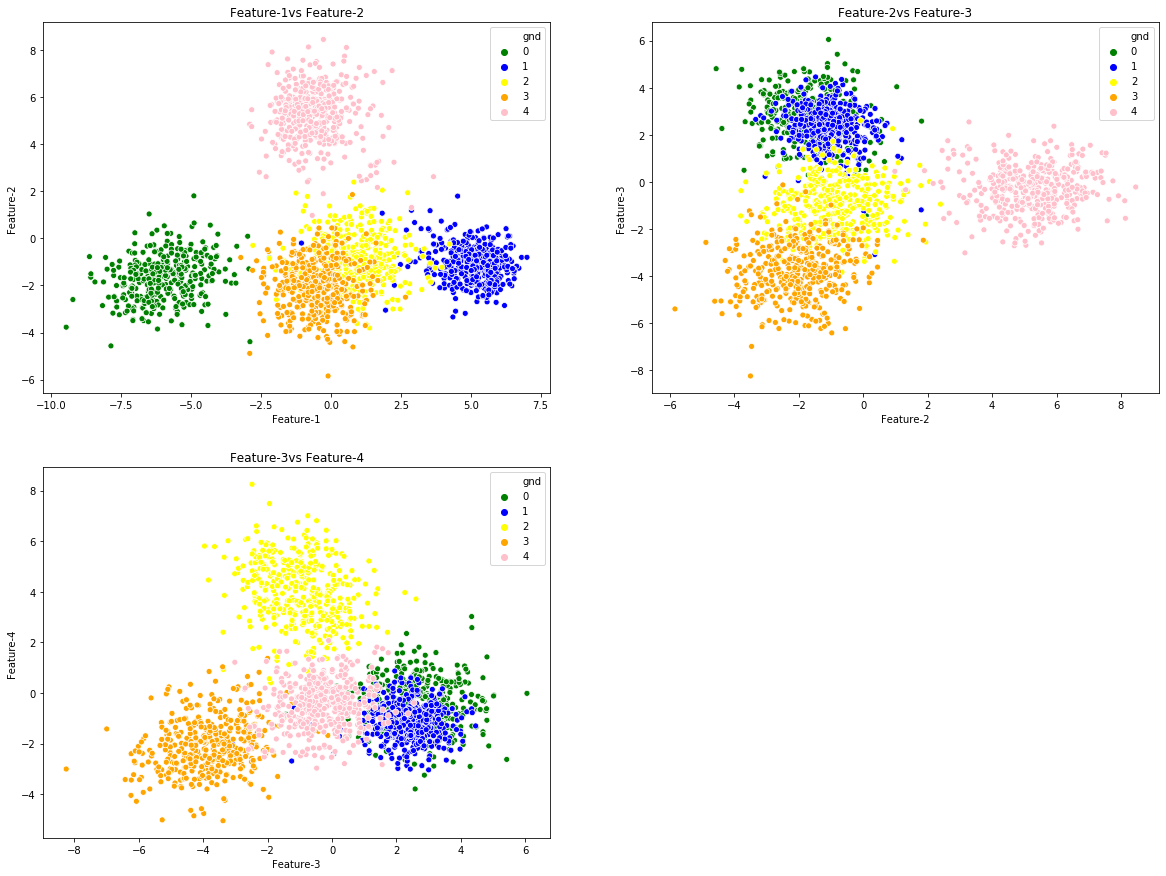

In [108]:
fig, axs = plt.subplots(2,2,figsize=(20,15))
k=0
fig.delaxes(axs[1][1])
for i in range(0,axs.shape[0]):
    for j in range(0,axs.shape[1]):
        sns.scatterplot(lda_with_label[k], lda_with_label[k+1],hue=lda_with_label.gnd,legend='full',ax=axs[i,j],palette=['green','blue','yellow','orange','pink'])
        axs[i,j].set(xlabel='Feature-'+str(k+1),ylabel='Feature-'+str(k+2))
        
        axs[i,j].set_title('Feature-'+str(k+1)+'vs Feature-'+str(k+2))
        
        if i==1 and j==0:
            break;
        k=k+1;

<h1>ANALYSIS::-></h1>
<h3>RESULTS [known classes] & SEPARABILITY=></h3>

<h4>LDA1 VS LDA2</h4>
<p>LDA1 :=>LDA 1 separates class label [0,1] from each other and from [2,3,4] very well.( i.e if we tend to draw a line on the LDA1 axes(x axes)) whereas Class labels [2,3,4] overlap with each other. </p>
<p>LDA2 :=>LDA 2 separates class label [4] from [0,1,2,3]very well if we draw a line on the LDA2 axes(y axes)). Class labels [0,1,2,3] overlap with each other. </p>

<h4>LDA2 VS LDA3</h4>
<p>LDA2 :=>LDA 2 separates class label [4] from [0,1,2,3]very well if we draw a line on the LDA2 axes(x axes)). Class labels [0,1,2,3] overlap with each other.</p>
<p>LDA3 :=>LDA 3 separates class label [3] from [0,1,2,4]very well if we draw a line on the LDA3 axes(y axes)). Class labels [0,1]and [2,4] overlap.</p>

<h4>LDA3 VS LDA4</h4>
<p>LDA3 :=>LDA 3 separates class label [3] from [0,1,2,4]very well if we draw a line on the LDA3 axes(x axes)). Class labels [0,1]and [2,4] overlap.</p>
<p>LDA4 :=>LDA 4 separates class label [2] from [0,1,3,4]very well if we draw a line on the LDA3 axes(y axes)). Class labels [0,1,3,4] overlap.</p>
<h3>RESULT::=> It can be concluded that first direction of LDA separates classes better than the rest of the directions which can be theortically proved by finding the ranked eigen values.</h3>

<h3>COMPARISON BETWEEN LDA AND PCA RESULTS:==></h3>
<p>1.PCA lets us find the principal components with the highest variation in the data. </p>
<p>2.LDA finds the directions taking the variation between the classes and the variation within the class into consideration. i.e Maximize(Var_between) and Minimize(var_within)</p>
<p>3.From looking at the plots of both PCA and LDA, we can easily conclude that the "class separability" provided by the lDA directions is far better than that provided by the PCA, whereas the overall variation of data is best in PCA.</p>
<p>4.Correlation between the class and the direction is also more in case of LDA whereas PC1 and PC2 accounted for only 0.19 and 0.15 of correltion with the class labels.</p>


<h6>Citations:=></h6>

<p>1.https://sebastianraschka.com/Articles/2014_python_lda.html</p>
<p>2.https://towardsdatascience.com/linear-discriminant-analysis-lda-101-using-r-6a97217a55a6</p>

<h1>2.3.2 Theoretical Question</h1>
<h5>Scanned</h5>